In [70]:
# Imports
import numpy as np
from pathlib import Path
from subcipher.text_utils import clean_text
from subcipher.stats import transition_matrix
from subcipher.alphabet import ALPHABET 
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

print("Imports successful.")

Imports successful.


In [ ]:
# Define path to corpus and load data
corpus_file_path = Path("data/raw/krakatit.txt") 

if not corpus_file_path.exists():
    print(f"Corpus file not found at: {corpus_file_path}")
    print("Please ensure you have a corpus file (e.g., krakatit.txt from Wikisource) at this location.")
    raw_text_corpus = "ABECEDA_JE_ZAKLAD_JAZYKA_A_STATISTIKY_POMAHAJI_S_ANALYZOU_TEXTU_" # Fallback example
else:
    with open(corpus_file_path, 'r', encoding='utf-8', errors='ignore') as f:
        raw_text_corpus = f.read()

print(f"Loaded corpus. Length: {len(raw_text_corpus)} characters.")
print(f"Corpus (first 200 chars): {raw_text_corpus[:200]}")

Corpus file not found at: data\raw\krakatit.txt
Please ensure you have a corpus file (e.g., krakatit.txt from Wikisource) at this location.
Loaded corpus. Length: 64 characters.
Corpus (first 200 chars): ABECEDA_JE_ZAKLAD_JAZYKA_A_STATISTIKY_POMAHAJI_S_ANALYZOU_TEXTU_


In [ ]:
# Clean the corpus text
cleaned_corpus = clean_text(raw_text_corpus)
print(f"Cleaned corpus. Length: {len(cleaned_corpus)} characters.")
print(f"Cleaned corpus (first 200 chars): {cleaned_corpus[:200]}")

if not cleaned_corpus:
    raise ValueError("Cleaned corpus is empty. Cannot build model.")


Cleaned corpus. Length: 64 characters.
Cleaned corpus (first 200 chars): ABECEDA_JE_ZAKLAD_JAZYKA_A_STATISTIKY_POMAHAJI_S_ANALYZOU_TEXTU_


In [ ]:
# Build the transition matrix
tm_ref = transition_matrix(cleaned_corpus)

print(f"Transition matrix built. Shape: {tm_ref.shape}")
print(f"Sum of all elements in matrix (should be close to 1.0): {np.sum(tm_ref)}")

Transition matrix built. Shape: (27, 27)
Sum of all elements in matrix (should be close to 1.0): 1.0


In [ ]:
# Inspect the matrix (optional)
print("\nSample of the transition matrix (first 5x5 elements):")
print(tm_ref[:5, :5])

# You can also find the most probable bigrams for a few characters
from subcipher.alphabet import ALPHABET, IDX2CHAR
print("\nMost probable characters following 'A':")
if 'A' in ALPHABET:
    a_index = ALPHABET.find('A')
    if a_index != -1 and a_index < tm_ref.shape[0]:
        top_indices = np.argsort(tm_ref[a_index, :])[-5:][::-1] # Top 5
        for idx in top_indices:
            print(f"  A -> {IDX2CHAR[idx]}: {tm_ref[a_index, idx]:.4f}")



Sample of the transition matrix (first 5x5 elements):
[[0.00135685 0.00135685 0.00135685 0.00135685 0.00135685]
 [0.00135685 0.00135685 0.00135685 0.00135685 0.00135685]
 [0.00135685 0.00135685 0.00135685 0.00135685 0.00135685]
 [0.00135685 0.00135685 0.00135685 0.00135685 0.00135685]
 [0.00135685 0.00135685 0.00135685 0.00135685 0.00135685]]

Most probable characters following 'A':
  A -> _: 0.0041
  A -> Z: 0.0014
  A -> Y: 0.0014
  A -> X: 0.0014
  A -> W: 0.0014


In [ ]:
# Save the matrix
output_model_dir = Path("data/model")
output_model_dir.mkdir(parents=True, exist_ok=True)
output_model_path = output_model_dir / "reference_tm.npy"

np.save(output_model_path, tm_ref)
print(f"\nReference transition matrix saved to: {output_model_path}")

# Verify loading
loaded_tm = np.load(output_model_path)
assert np.array_equal(loaded_tm, tm_ref)
print("Saved matrix loaded and verified successfully.")


Reference transition matrix saved to: data\model\reference_tm.npy
Saved matrix loaded and verified successfully.


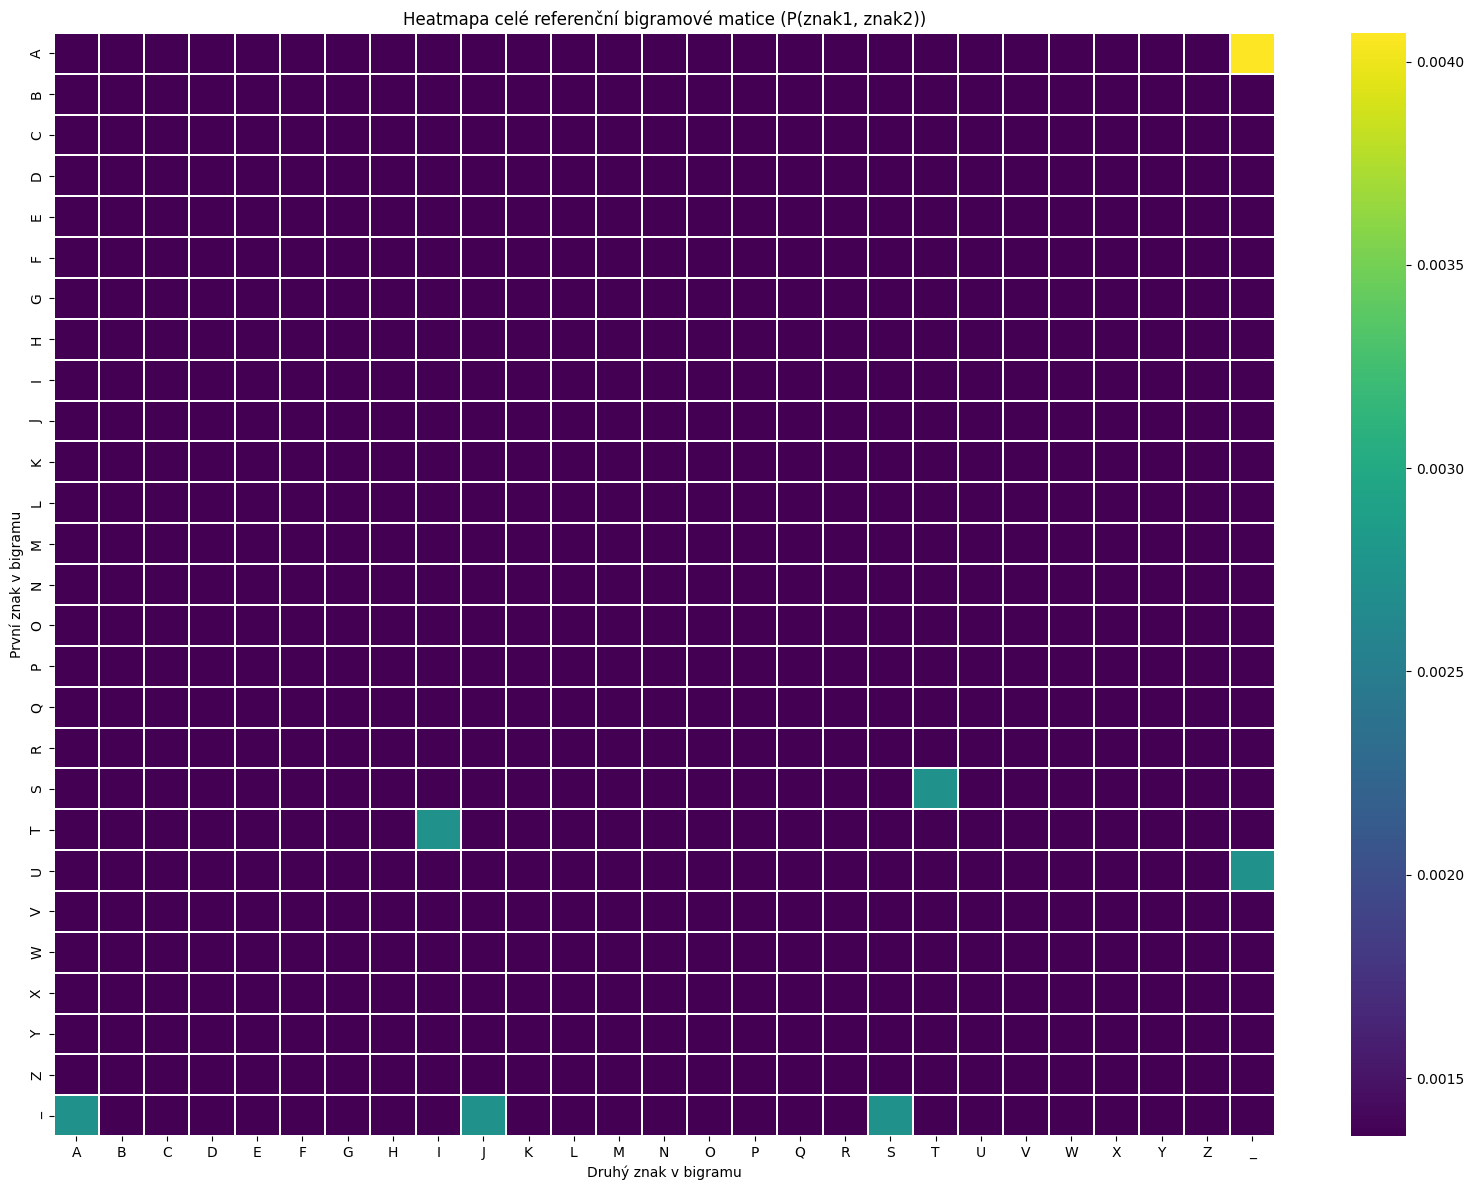

In [ ]:
# Visualize the transition matrix
chars_to_plot = ['A', 'B', 'C']
indices_to_plot = [ALPHABET.find(char) for char in chars_to_plot]
subset_tm = tm_ref[indices_to_plot, :]

plt.figure(figsize=(16, 12)) 
sns.heatmap(
    tm_ref,
    xticklabels=list(ALPHABET),
    yticklabels=list(ALPHABET),
    cmap="viridis", 
    annot=False,   

    linewidths=.1
)
plt.title("Heatmapa celé referenční bigramové matice (P(znak1, znak2))")
plt.xlabel("Druhý znak v bigramu")
plt.ylabel("První znak v bigramu")
plt.tight_layout()
plt.show()